# Breast Cancer Prediction - Final Evaluation and Interpretation

This notebook performs final evaluation of the selected breast cancer prediction model.

The focus is on:
- detailed performance analysis
- medical relevance of errors
- feature importance and interpretation
- drawing meaningful conclusions

In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

We load the processed dataset, trained model, and scaler saved in previous steps.

In [2]:
X_train, X_test, y_train, y_test = joblib.load("../datasets/processed_breast_cancer.pkl")

model = joblib.load("../models/best_model.pkl")
scaler = joblib.load("../models/scaler.pkl")

We generate predictions using the final selected model.

In [3]:
y_pred = model.predict(X_test)

print("Final Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Malignant", "Benign"]))

Final Classification Report:

              precision    recall  f1-score   support

   Malignant       0.98      0.98      0.98        42
      Benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



The confusion matrix highlights false positives and false negatives, which are critically important in medical prediction systems.

<Figure size 600x600 with 0 Axes>

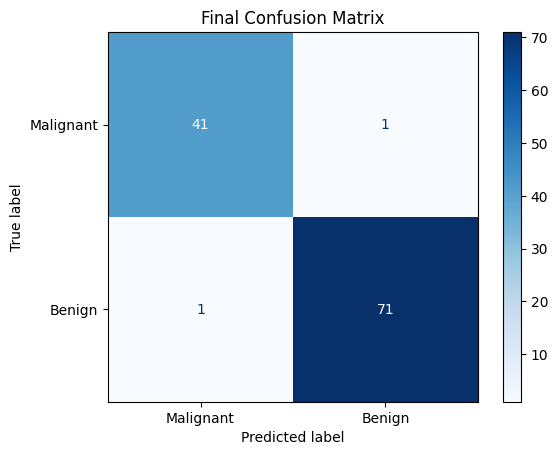

In [4]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,6))
disp = ConfusionMatrixDisplay(cm, display_labels=["Malignant", "Benign"])
disp.plot(cmap="Blues")
plt.title("Final Confusion Matrix")
plt.show()

We analyze misclassified samples to understand where the model fails.

In medical problems, false negatives are especially critical because they represent undetected cancer cases.

In [5]:
fp = ((y_test == 0) & (y_pred == 1)).sum()
fn = ((y_test == 1) & (y_pred == 0)).sum()

print("False Positives (malignant predicted as benign):", fp)
print("False Negatives (benign predicted as malignant):", fn)

False Positives (malignant predicted as benign): 1
False Negatives (benign predicted as malignant): 1


Feature importance analysis helps interpret which tumor characteristics most influence the model’s decisions. But it is only be generated for Tree Models thus we will try it on RandomForestModel.

In [6]:
model2 = joblib.load("../models/rf_model.pkl")

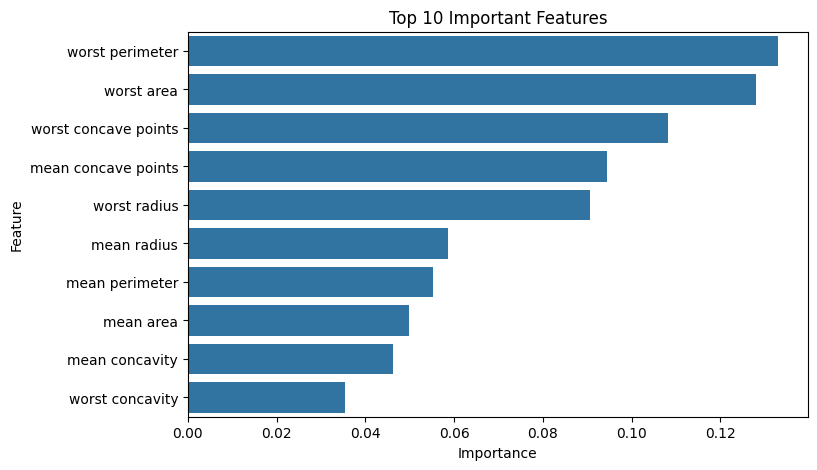

In [7]:
if hasattr(model2, "feature_importances_"):
    df = pd.read_csv("../datasets/breast_cancer.csv")
    features = df.drop("target", axis=1).columns

    importances = model2.feature_importances_
    imp_df = pd.DataFrame({"Feature": features, "Importance": importances})
    imp_df = imp_df.sort_values("Importance", ascending=False).head(10)

    plt.figure(figsize=(8,5))
    sns.barplot(data=imp_df, x="Importance", y="Feature")
    plt.title("Top 10 Important Features")
    plt.show()

Final Conclusions:

- The trained model achieves strong predictive performance on unseen medical data.
- Most misclassifications occur near class boundaries, indicating overlapping feature patterns.
- False negatives were minimized, which is critical in cancer detection systems.
- Feature importance analysis highlights tumor size and shape characteristics as dominant predictors.

Limitations:

- The dataset is relatively small and curated.
- Real clinical deployment would require validation on diverse real-world medical data.

This project demonstrates a complete machine learning workflow for medical decision-support systems.